##  Bike Sharing Assignment
                                                                                        By : Naveen Rajpal
    
    Data Understanding	
	- instant: record index
    - dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
Assignment-based Subjective Questions
1. From your analysis of the categorical variables from the dataset, what could you infer about
their effect on the dependent variable? (3 marks)
2. Why is it important to use drop_first=True during dummy variable creation? (2 mark)
3. Looking at the pair-plot among the numerical variables, which one has the highest correlation
with the target variable? (1 mark)
4. How did you validate the assumptions of Linear Regression after building the model on the
training set? (3 marks)
5. Based on the final model, which are the top 3 features contributing significantly towards
explaining the demand of the shared bikes? (2 marks)<br><br>

General Subjective Questions
1. Explain the linear regression algorithm in detail. (4 marks)
2. Explain the Anscombe’s quartet in detail. (3 marks)
3. What is Pearson’s R? (3 marks)
4. What is scaling? Why is scaling performed? What is the difference between normalized scaling
and standardized scaling? (3 marks)
5. You might have observed that sometimes the value of VIF is infinite. Why does this happen?
(3 marks)
6. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.
(3 marks)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Importing Important/required Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Reading data day.csv

In [2]:
Bike_sharing_data=pd.read_csv("day.csv")

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking size of the data

In [3]:
print("Data Shape is : ",Bike_sharing_data.shape[0],"Rows and",Bike_sharing_data.shape[1],"Columns")

Data Shape is :  730 Rows and 16 Columns


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking info of all available columns

In [4]:
print(Bike_sharing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking top rows of data

In [5]:
Bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Observations :<br>
Dataset has 730 rows and 16 columns.<br>
Except one column, all other are either float or integer type.<br>
One column is date type.<br>
Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.<br>
will replace those with categories.
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Chekcing Stats of Bike Data

In [6]:
Bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking for any missing values in columns

In [7]:
Bike_sharing_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Drop columns that are not useful for data analysis
- instant:as it is the record index
- dteday: as the features of date are alreeady there like yr month and weekday
- casual and registered as they are in cnt, because cnt is sum of both the values

In [8]:
Bike_sharing_data.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
looking at data after dropping the columns which are of no use.

In [9]:
Bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
looking at the info of the bike data

In [10]:
Bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fields available in bike data

In [11]:
Bike_sharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking correlation of the data

In [12]:
Bike_sharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Chekcing unique count in the bike data fields

In [13]:
Bike_sharing_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Creating list of numerical variables

In [14]:
num_cols = ["temp", "atemp", "hum", "windspeed","cnt","weekday"]

Checking outliers in numerical fields

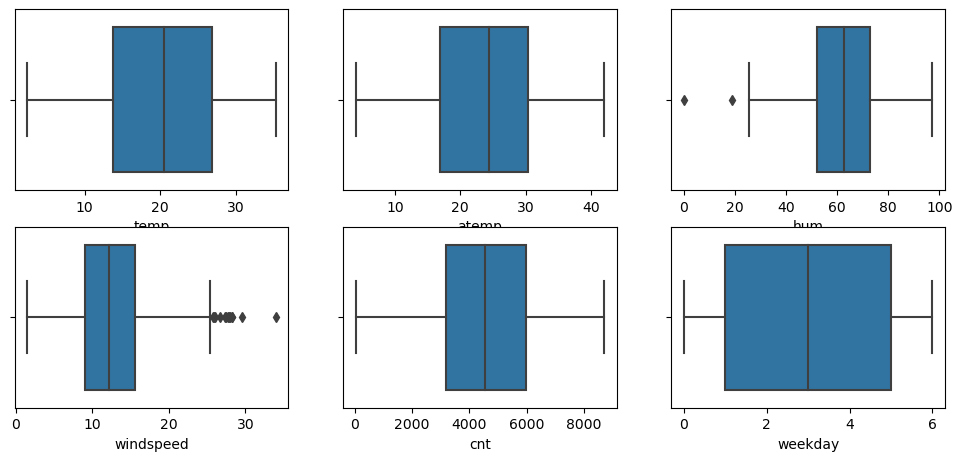

In [15]:
i = 1
plt.figure(figsize=(12,8))
for col in num_cols:
    plt.subplot(3,3,i)
    sns.boxplot(x=Bike_sharing_data[col])
    i+=1

No such outliers observed in above boxplots.
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Creating Categories of categorical features

In [16]:
# Creating weekday categories
Bike_sharing_data['weekday']=Bike_sharing_data['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',
                                                                   4:'Thu',5:'Fri',6:'Sat'})

# Creating weathersit categories
Bike_sharing_data['weathersit']=Bike_sharing_data['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light_Rainy',
                                                                         4:'Heavy_Rainy'})

# Creating season categories
Bike_sharing_data['season']=Bike_sharing_data['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# Creating month categories
Bike_sharing_data['mnth']=Bike_sharing_data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                                             6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Looking at the data

In [17]:
Bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Creating list of Category type columns 

In [18]:
cat_col_types=Bike_sharing_data.select_dtypes(include=['object'])

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking column wise values count in category type columns.

In [19]:
for i in cat_col_types:
    print(Bike_sharing_data[i].value_counts())
    print("x"*90)

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Clear          463
Cloudy         246
Light_Rainy     21
Name: weathersit, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Drawing pairplot to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

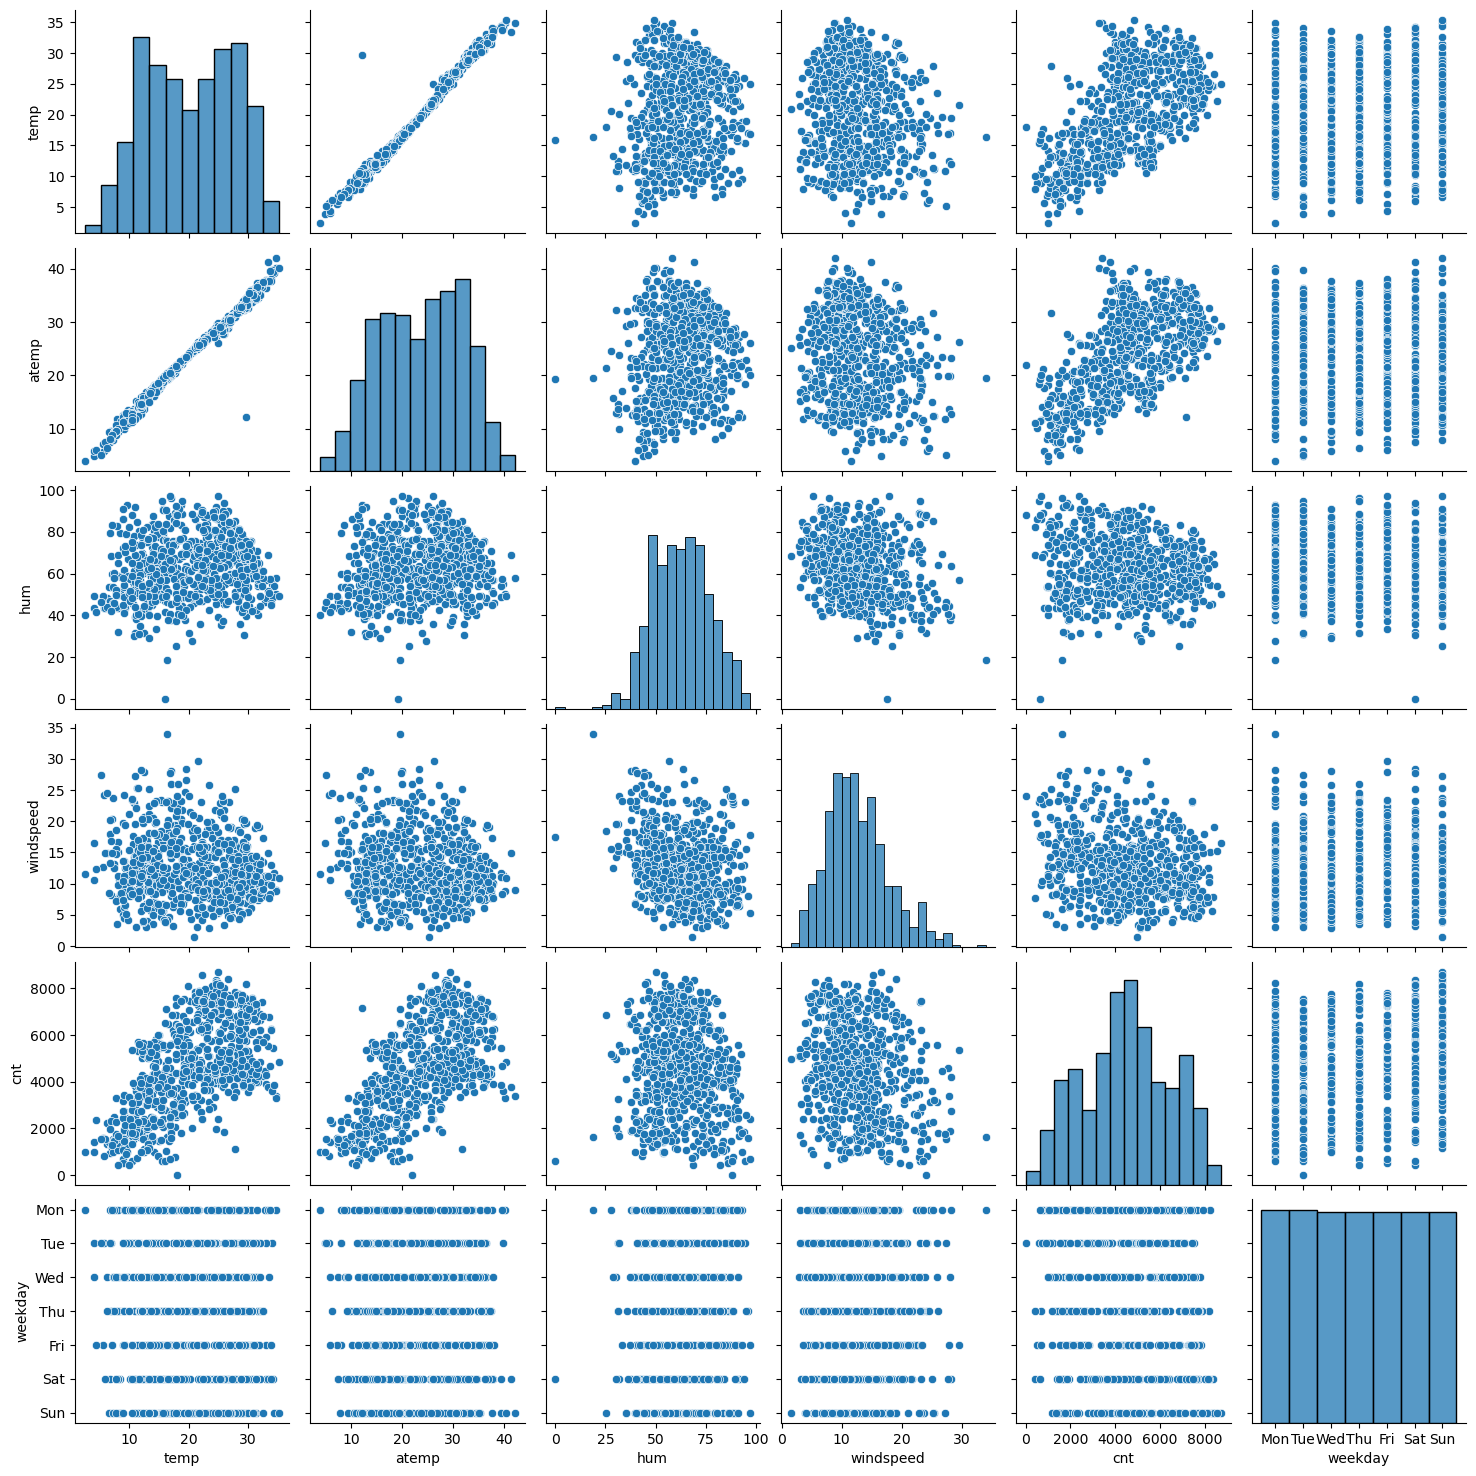

In [20]:
plt.figure(figsize = (15,30))
sns.pairplot(data=Bike_sharing_data,vars=num_cols)
plt.show()

So from the above plots we can clearly understand that temp and atemp are having high correlation<br>
And from the plots we can also say that there is alinear relationship between temp and atemp<br>
cnt is also correlated with temp & atemp<br>
we may use one from temp and atemp field, one may be dropped while doing EDA

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Heatmap to check correlation between numerical features

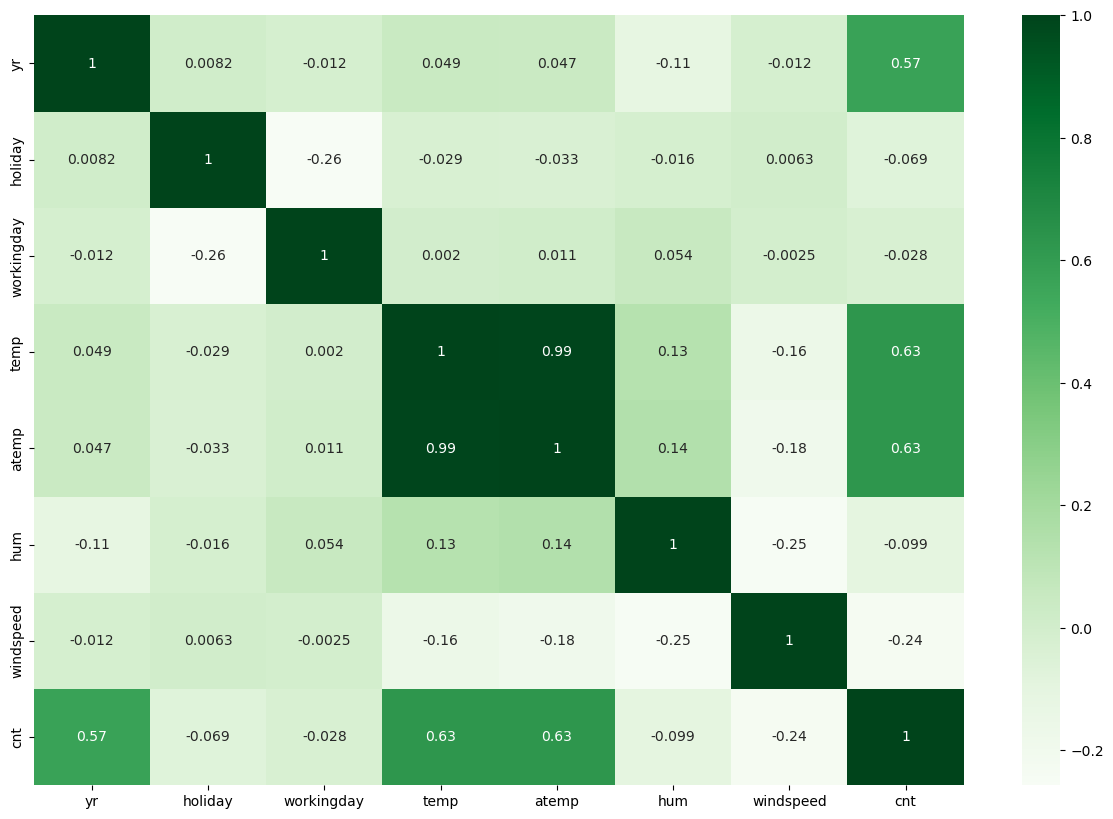

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(Bike_sharing_data.corr(),cmap="Greens",annot=True)
plt.show()

cnt is correlated with yr<br>
cnt is correlated with temp/atemp<br>
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
visualising the categorical variables

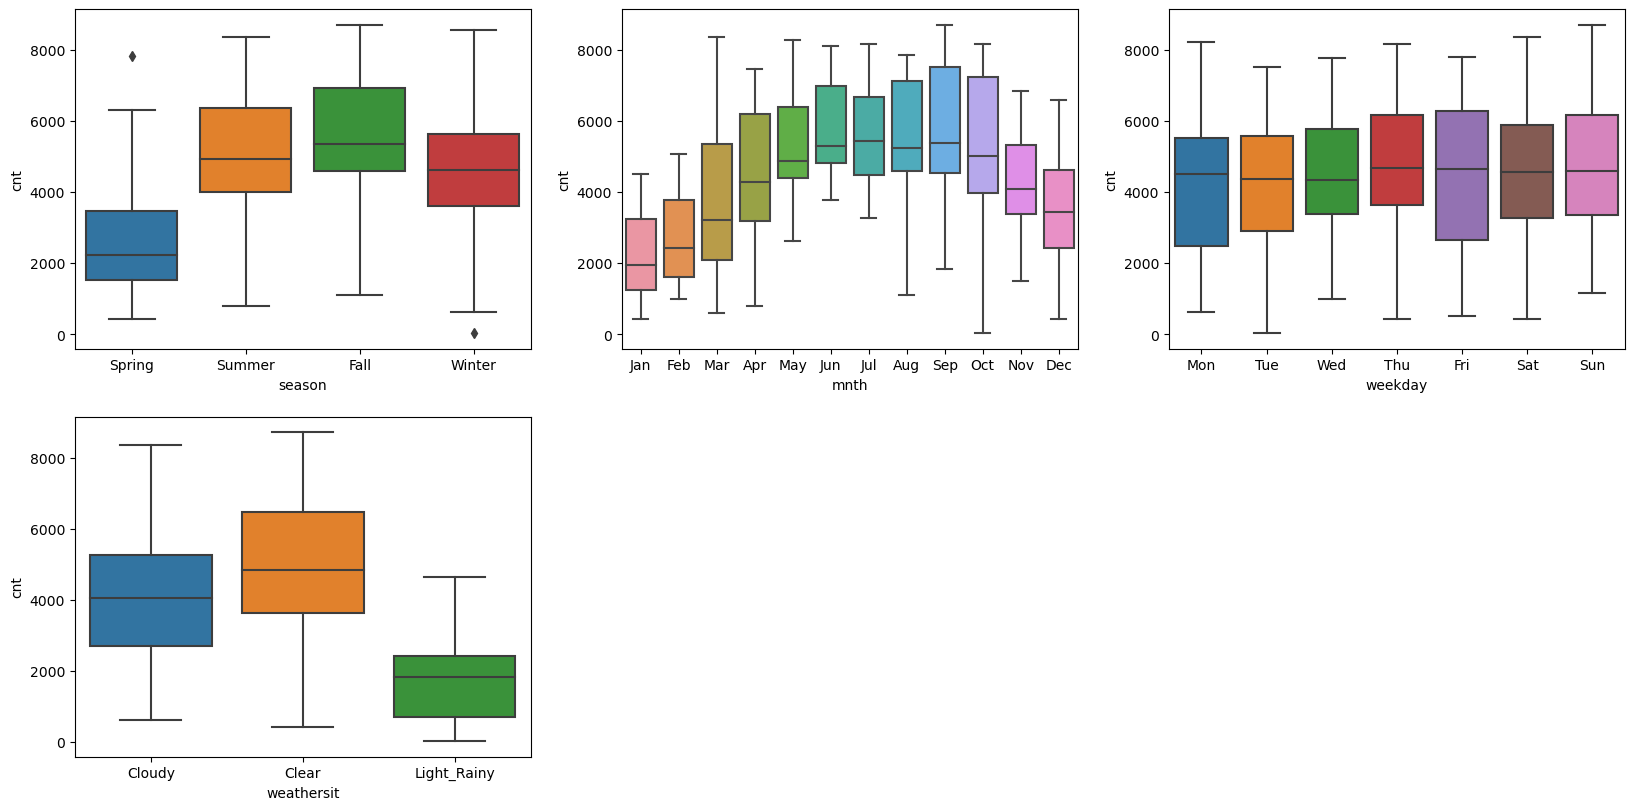

In [22]:
plt.figure(figsize=(20,15))
i=1
for col in cat_col_types:
    plt.subplot(3,3,i)
    sns.boxplot(x=col,y='cnt',data=Bike_sharing_data)
    i=i+1

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Data preparation for linear regression<br>
Creating dummy Columns for categorical variables in season, mnth and weekday excluding the first value availbale in column.<br>


In [23]:
Bike_sharing_data = pd.get_dummies(data=Bike_sharing_data,columns=["season","mnth","weekday","weathersit"],drop_first=True)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Looking at sample dataset

In [24]:
Bike_sharing_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rainy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Total columns after creating dummy columns

In [25]:
Bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light_Rainy'],
      dtype='object')

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Importing important libraries required in predictive model building.

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Shape of Bike data

In [27]:
Bike_sharing_data.shape

(730, 30)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Spliting data into Train and Test

In [28]:
#Train Test split with 70:30 ratio
X_train, X_test = train_test_split(Bike_sharing_data, train_size=0.7, random_state=100)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Shape of Train and Test data sets after split

In [29]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


Let us scale continuous variables and Fit and transform training set only

In [30]:
scaler=MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Looking at X_train stats

In [31]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rainy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can clearly see all the values are sclaed between 0 and 1
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Lets see sample data too

In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rainy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Checking correlation between Scaled X_train data

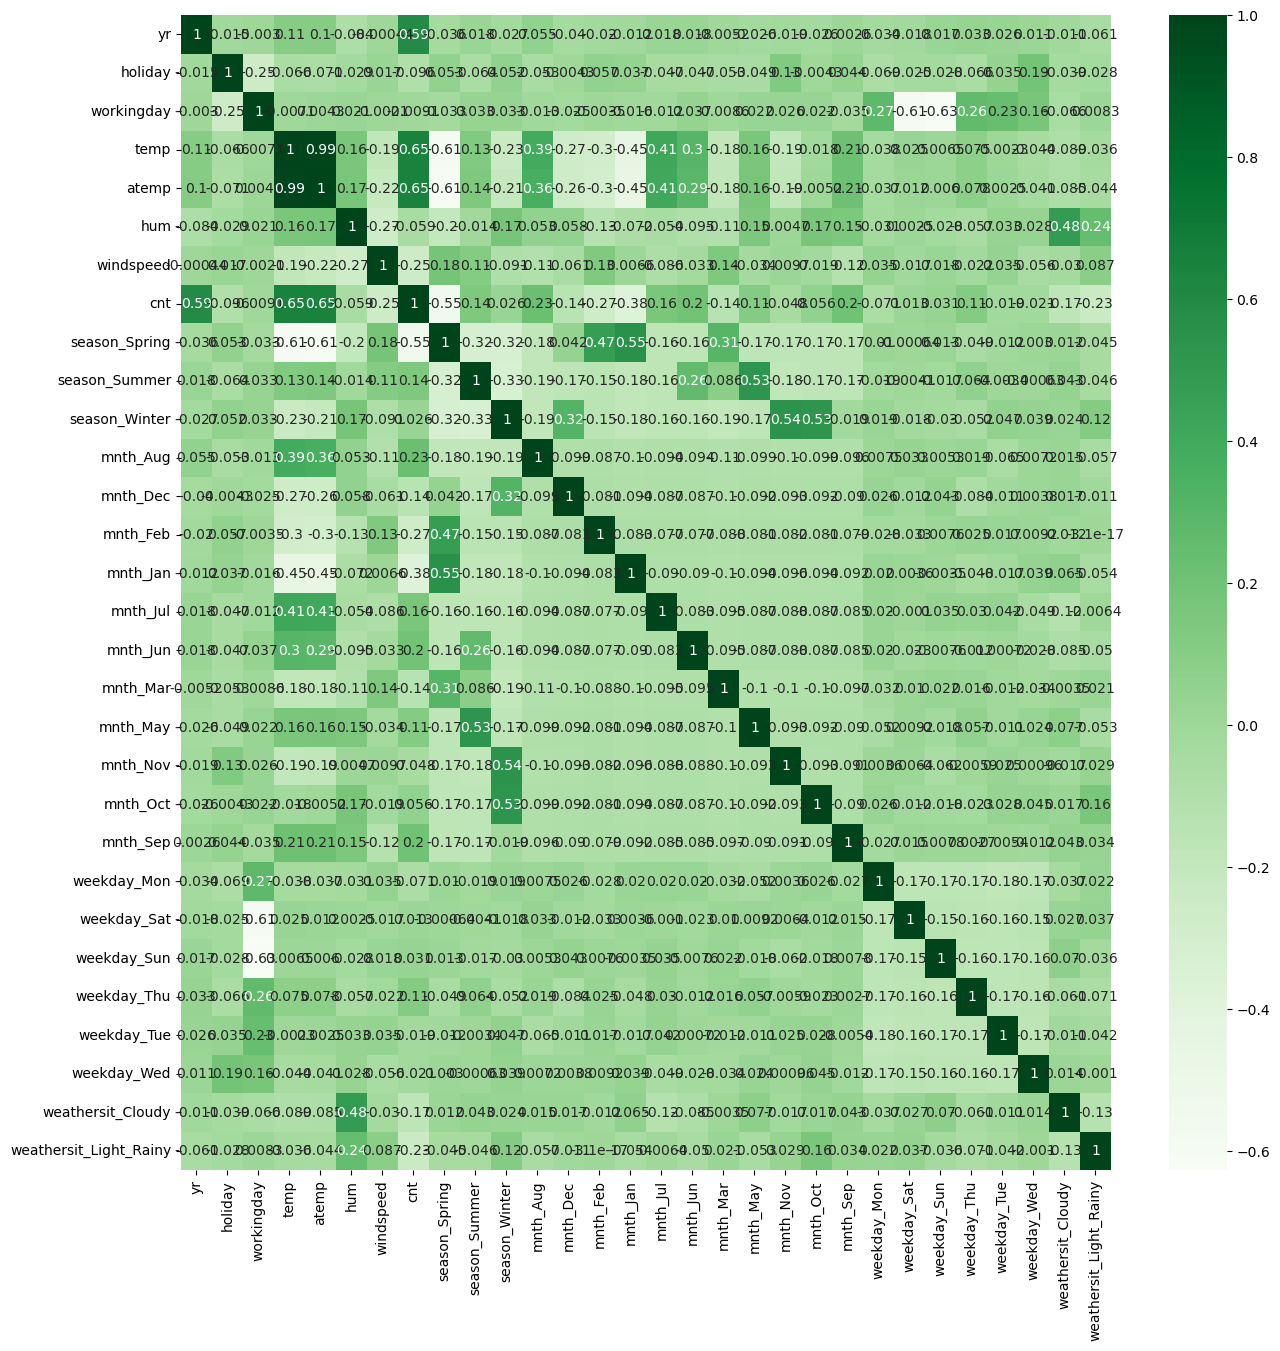

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,cmap="Greens")
plt.show()

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Building Model with RFE

In [34]:
# Defining target variable
y_train = X_train.pop('cnt')

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

lets find the top 15 features which may has correlation with the target feature

In [36]:
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
below are the fields selected or rejected for RFE

In [37]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light_Rainy', True, 1)]

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Function definition of getting compatibility of the features in RFE model

In [38]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Creating function to get VIF information

In [39]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Creating list of columns selected for RFE model building process

In [40]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train_rfe=X_train.columns[rfe.support_].tolist()
print(X_train_rfe)

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy', 'weathersit_Light_Rainy']


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
List of features not selected for RFE model building

In [41]:
# Features not selected by RFE
X_train_rfe_exlusion=X_train.columns[~rfe.support_].tolist()
print(X_train_rfe_exlusion)

['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed']


###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Creating Models
###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model 1

In [42]:
#Selected columns for Model 1 - all columns selected by RFE
X_train_rfe=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
             'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
             'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
             'weathersit_Light_Rainy']
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          8.15e-189
Time:                        01:59:58   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model 2

In [43]:
#Drop "hum" due to High VIF
X_train_rfe=['yr', 'holiday', 'temp',  'windspeed', 'season_Spring',
             'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan',
             'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
             'weathersit_Light_Rainy']
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          4.75e-186
Time:                        01:59:58   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model 3

In [44]:
#Drop "season_Summer" due to High p-score
X_train_rfe=['yr', 'holiday', 'temp',  'windspeed', 'season_Spring',
             'season_Winter', 'mnth_Dec', 'mnth_Jan',
             'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
             'weathersit_Light_Rainy']
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          4.08e-186
Time:                        01:59:58   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model 4

In [45]:
#Drop 'mnth_Nov' due to High p-score
X_train_rfe=['yr', 'holiday', 'temp',  'windspeed', 'season_Spring',
             'season_Winter', 'mnth_Dec', 'mnth_Jan',
             'mnth_Jul',  'mnth_Sep', 'weathersit_Cloudy',
             'weathersit_Light_Rainy']
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          5.72e-186
Time:                        01:59:58   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model 5

In [46]:
#Drop 'mnth_Dec' due to High p-score
X_train_rfe=['yr', 'holiday', 'temp',  'windspeed', 'season_Spring',
             'season_Winter', 'mnth_Jan',
             'mnth_Jul',  'mnth_Sep', 'weathersit_Cloudy',
             'weathersit_Light_Rainy']

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          2.87e-186
Time:                        01:59:58   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Model 6

In [47]:
#Drop 'mnth_Jan' due to High p-score
X_train_rfe=['yr', 'holiday', 'temp',  'windspeed', 'season_Spring',
             'season_Winter',
             'mnth_Jul',  'mnth_Sep', 'weathersit_Cloudy',
             'weathersit_Light_Rainy']

build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          3.10e-186
Time:                        01:59:58   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Now all p-scores are low and VIF are less than 5, this can be a suitable model

In [48]:
#Creating a function to build model for the features finally selected by RFE
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [49]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[X_train_rfe],y_train)
print(lr.intercept_,lr.coef_)

0.2531330823670777 [ 0.23424441 -0.09801375  0.44978915 -0.13951037 -0.11228591  0.04489329
 -0.07293462  0.05731097 -0.07964992 -0.28546256]


# Residual analysis

Lets check final model and predict the target variable from that model.

In [50]:
y_train_pred = lr.predict(X_train[X_train_rfe])

In [51]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

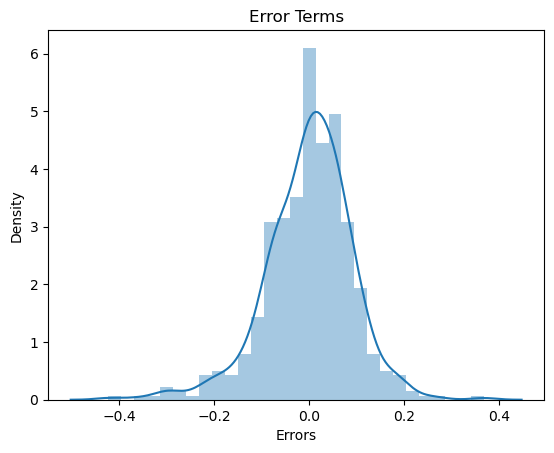

In [52]:
plot_res_dist(y_train, y_train_pred)

Error terms chart is normally distributed
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------
Comparison of target values with predicted target values.

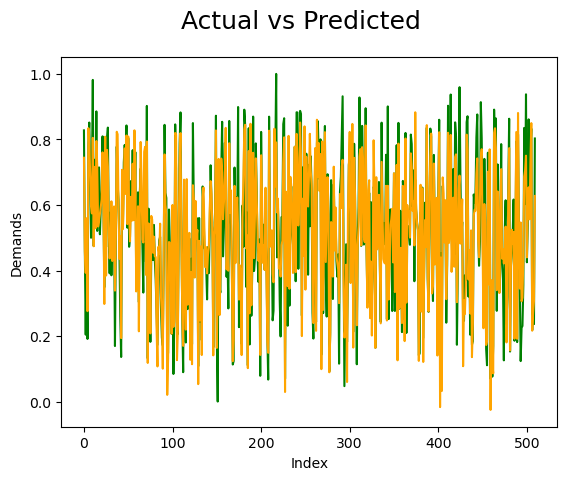

In [53]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="orange")
plt.suptitle('Actual vs Predicted', fontsize = 18)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions

## R-Squared value for train predictions

In [54]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8322027416440079

### Prediction of values on test dataset

Scaling of test data

In [55]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
X_test[num_vars] = scaler.transform(X_test[num_vars])

Creating target variable of test data

In [56]:
y_test=X_test.pop("cnt")

validating the test data

In [57]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light_Rainy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


Predicting test data values

In [58]:
y_pred = lr.predict(X_test[X_train_rfe])

Find out the R squared value between test and predicted test data sets. 

In [59]:
r2_score(y_test,y_pred)

0.8074869048294189

Text(0, 0.5, 'y_pred')

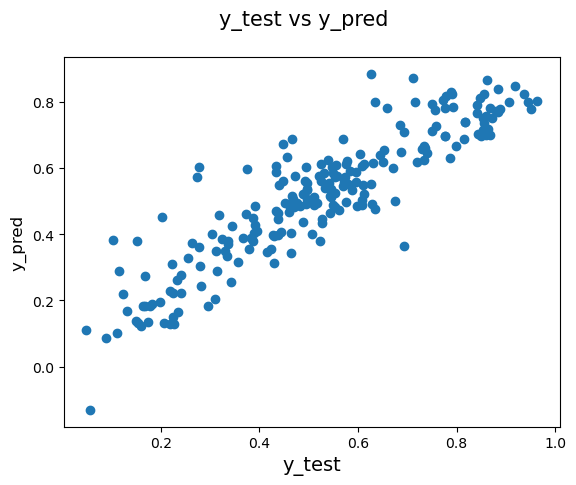

In [60]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it

In [61]:
lm = build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):          3.10e-186
Time:                        02:00:00   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Observations
Significant variables to predict the demand for shared bikes are below.

- temp
- windspeed
- yr
- Season <br>
        Spring<br>
        Winter<br>
- months<br>
        July<br>
        Sep<br>
- weathersit<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
- holiday